In [36]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from itertools import combinations

In [37]:
def generate_binary_vectors(n):
    binary_vectors = np.array([[int(j) for j in format(i, '0'+str(n)+'b')] for i in range(2**n)])#n차원의 모든 이진벡터 생성
    return binary_vectors   

In [43]:
arr = generate_binary_vectors(4)
result=[]
A=[]
for i in range(arr.shape[0]+1):
    combinations_list = list(combinations(arr,i))
    combinations_list = [[x.tolist() for x in sublist] for sublist in combinations_list]  
    combinations_list = [[list(x) for x in sublist] for sublist in combinations_list]
    for comb in combinations_list:
        result.append(comb)

for subset in result:
    T=True
    for i in subset:
        # T=True
        for a,b in enumerate(i):
            if b==0:
                B=i.copy()
                B[a]=1
                if B not in subset:
                    T=False
                    break
            if T==False:
                break
        if T==False:
            break
        for a,b in combinations(range(len(i)),2):
            if i[a]==1 and i[b]==1:
                continue
            B=i.copy()
            B[a]=1
            B[b]=1
            if i[a]==1 and i[b]==0:
                if B not in subset:
                    T=False
                    break
            C=i.copy()
            C[a]=1
            C[b]=0
            if i[a]==0 and i[b]==1:
                if B not in subset or C not in subset:
                    T=False
                    break
            D=i.copy()
            C[a]=0
            C[b]=1
            if i[a]==0 and i[b]==0:
                if B not in subset or C not in subset or D not in subset:
                    T=False
                    break
        if T==False:
            break
    if T==True:
        A.append(subset)    


        


27


In [71]:
def Boolean_func(n):
    arr = generate_binary_vectors(n)
    result=[]
    A=[]
    for i in range(arr.shape[0]+1):
        combinations_list = list(combinations(arr,i))
        combinations_list = [[x.tolist() for x in sublist] for sublist in combinations_list]  
        combinations_list = [[list(x) for x in sublist] for sublist in combinations_list]
        for comb in combinations_list:
            result.append(comb)

    for subset in result:
        T=True
        for i in subset:
            for a,b in enumerate(i):
                if b==0:
                    B=i.copy()
                    B[a]=1
                    if B not in subset:
                        T=False
                        break
                if T==False:
                    break
            if T==False:
                break
            for a,b in combinations(range(len(i)),2):
                if i[a]==1 and i[b]==1:
                    continue
                B=i.copy()
                B[a]=1
                B[b]=1
                if i[a]==1 and i[b]==0:
                    if B not in subset:
                        T=False
                        break
                C=i.copy()
                C[a]=1
                C[b]=0
                if i[a]==0 and i[b]==1:
                    if B not in subset or C not in subset:
                        T=False
                        break
                D=i.copy()
                C[a]=0
                C[b]=1
                if i[a]==0 and i[b]==0:
                    if B not in subset or C not in subset or D not in subset:
                        T=False
                        break
            if T==False:
                break
        if T==True and len(subset) !=0 and len(subset) != 2**n:
            A.append(subset) 
    return [np.array(sublist) for sublist in A]

In [73]:
def title(A):       #plot.title 할떄 사용
    B = []
    for a in A:
        s = '{'
        for i,v in enumerate(a):
            if i != 0:
                s+=','
            s += ''.join(map(str, v))
        s += '}'
        B.append(s)
    return B

In [12]:
P = np.linspace(0, 0.5, 100)
def q_y(p,y,A):         #p일떄 q(y)값 구하기
  total=0
  for a in A:
    total+=p_y(p,y,a)
  return np.around(total/A.shape[0],10)
def p_y(p,y,a): 
  sum=1
  for i in range(a.shape[0]):
    if y[i]==a[i]:
      sum*=(1-p)
    else:
      sum*=p
  return sum

In [13]:
def tan_line(m,A,co): #접선구하기
    x=sy.Symbol('x')
    total=0
    for a in A:
        sum=1
        for r,s in zip(m,a):
            if r==s:
                sum*=(1-x)
            else:
                sum*=x
        total+=sum
    total/=A.shape[0]
    derivative = total.diff()
    result = derivative.subs(x,0.5)
    plt.plot(P,result*(P-1/2)+1/(2**m.shape[0]),'--',color=co)


In [78]:
def graph(n):
    A=Boolean_func(n)
    T=generate_binary_vectors(n)  
    for b,a in enumerate(A):
        C=[]
        D=[]
        alpha=0
        beta=1
        plt.figure()
        for i in T:
            y=q_y(P,i,a)
            is_in = any((i == row).all() for row in a)  #i가 a에 속하면 빨간색 선
            if is_in:
                co='red'
            else:
                co='blue'
            plt.plot(P,y,color=co)

            if y[0]==0:   #blue
                if y[50]>alpha:
                    alpha=y[50]
                    C.clear()
                    C.append(i)
                elif y[50]==alpha:
                    C.append(i)
            else:         #red
                if y[50]<beta:
                    beta=y[50]
                    D.clear()
                    D.append(i)
                elif y[50]==beta:
                    D.append(i)
        tan_line(D[0],a,'red')
        tan_line(C[0],a,'blue')
        D_str = '{' + ','.join([''.join(map(str, arr)) for arr in D[::-1]]) + '}'
        C_str = '{' + ','.join([''.join(map(str, arr)) for arr in C[::-1]]) + '}'
        plt.figtext(0, 0.7, f'Min:{D_str}', ha='right', va='top', fontsize=12, color='red')
        plt.figtext(0, 0.5, f'Max:{C_str}', ha='right', va='top', fontsize=12, color='blue')
        plt.title(f'A={title(A)[b]}')
        plt.xlabel('p')
        plt.ylabel('q')
        plt.show()

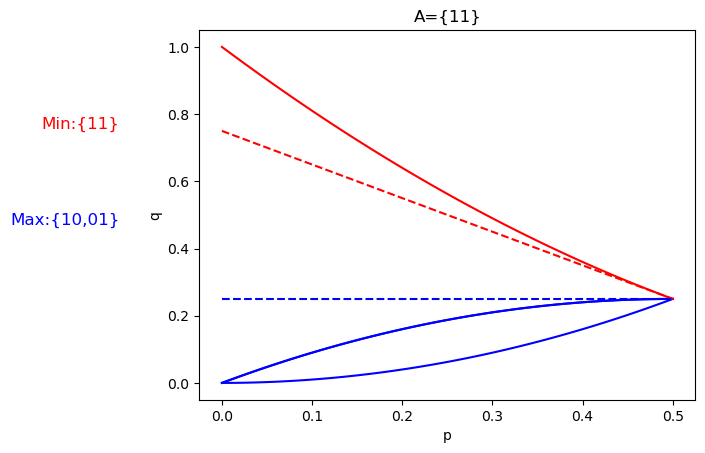

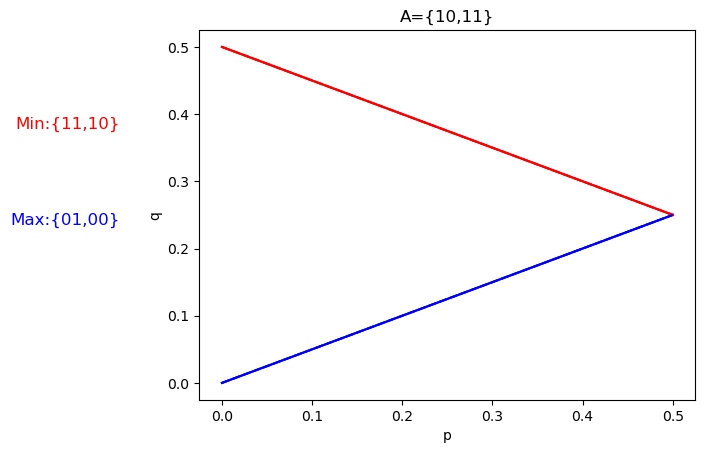

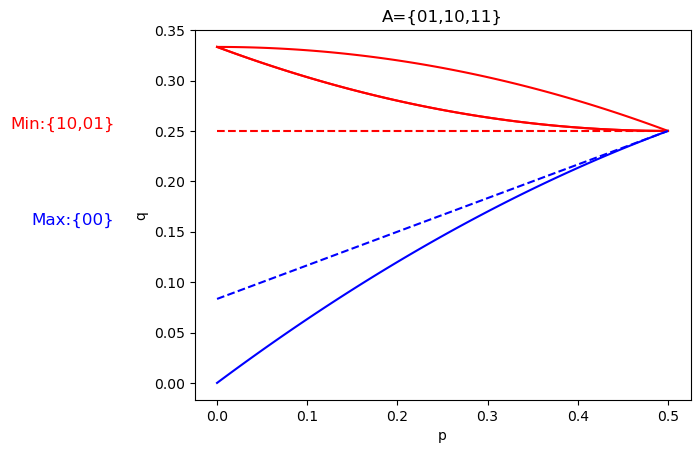

In [79]:
graph(2)


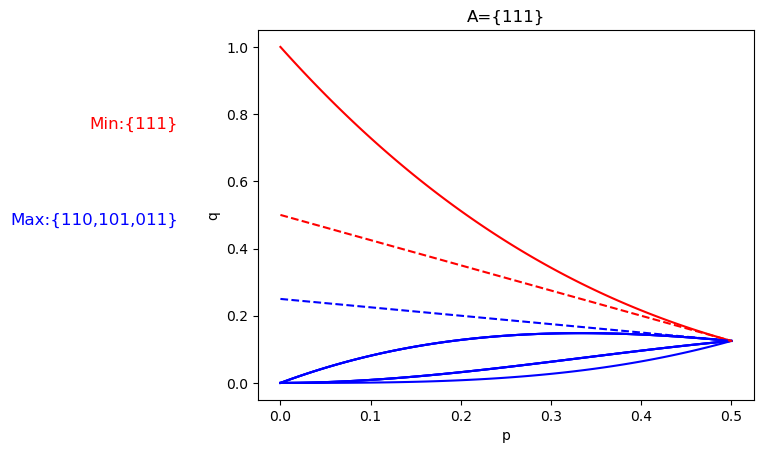

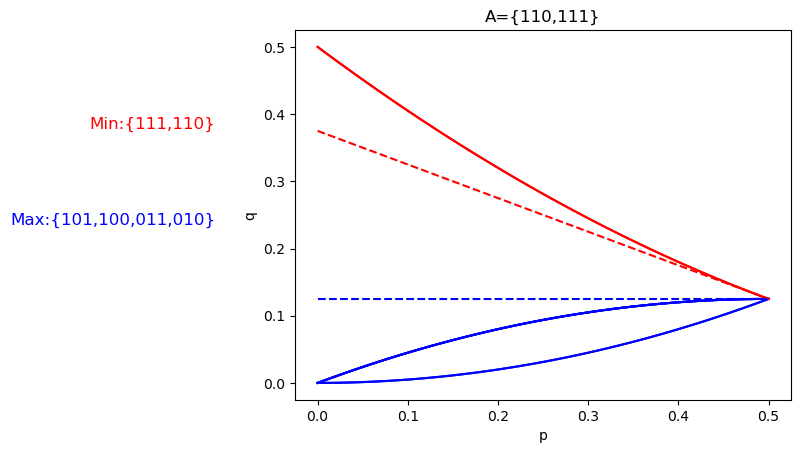

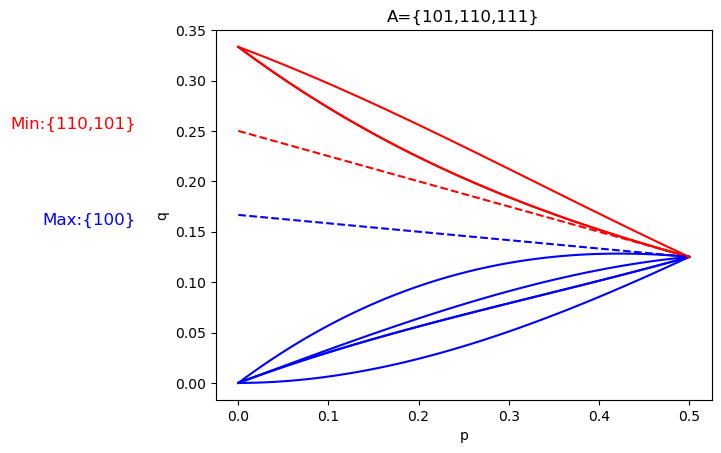

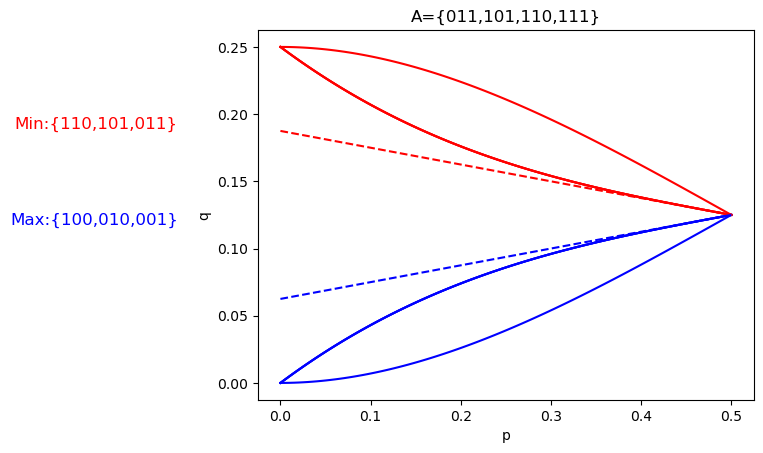

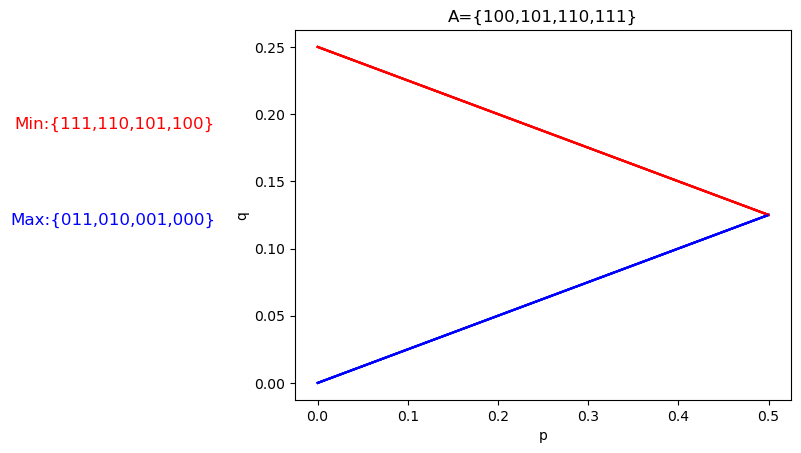

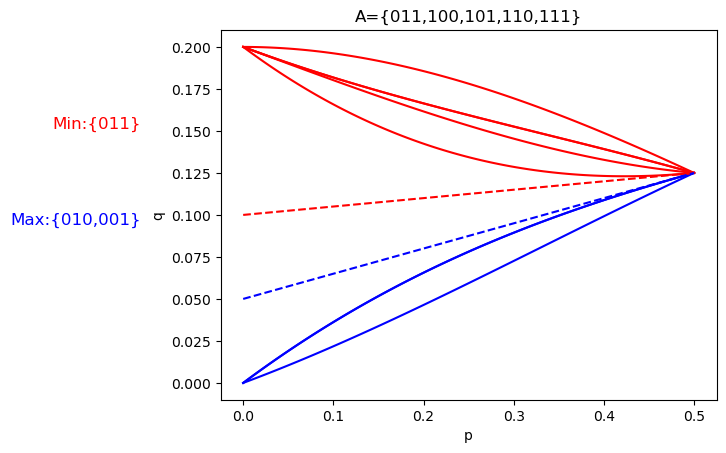

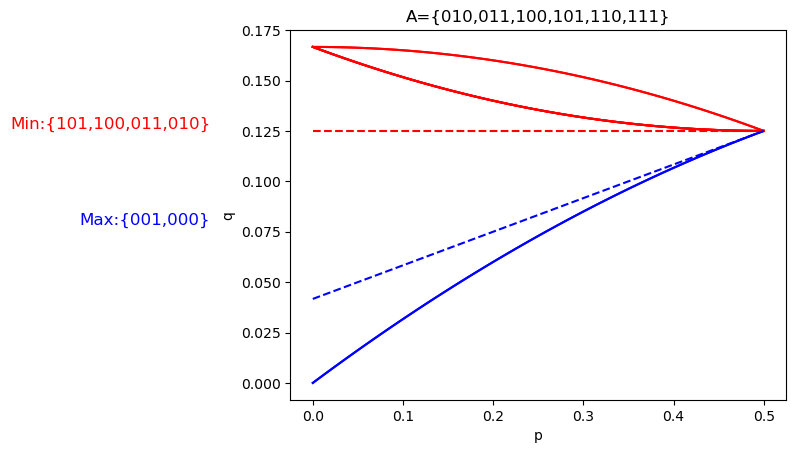

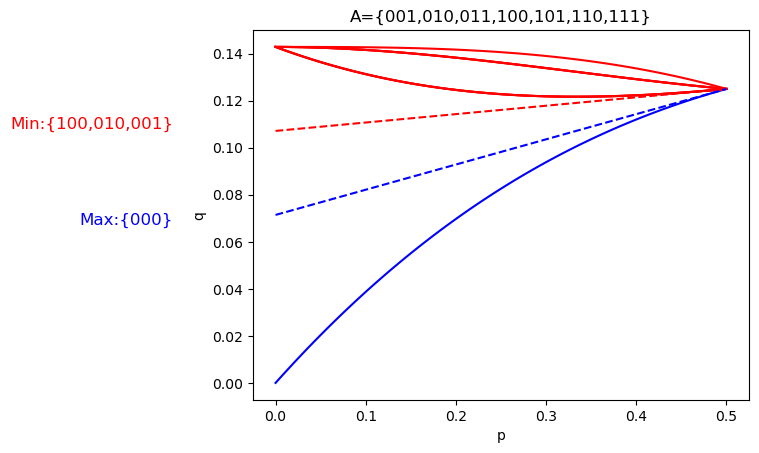

In [80]:
graph(3)

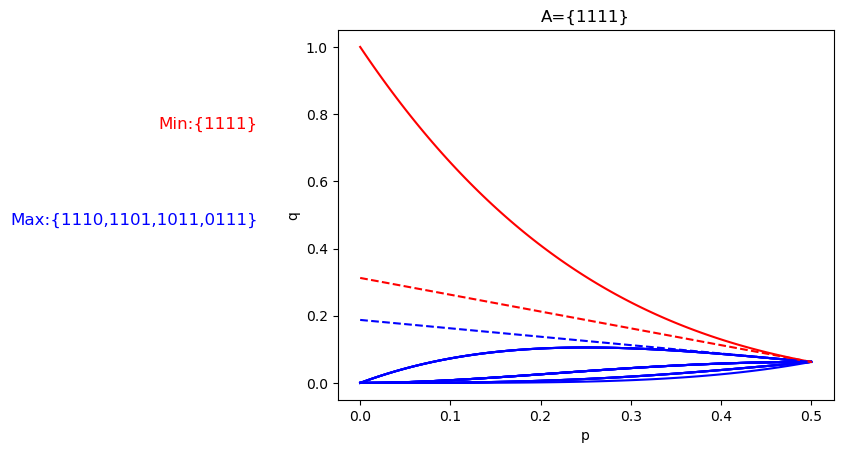

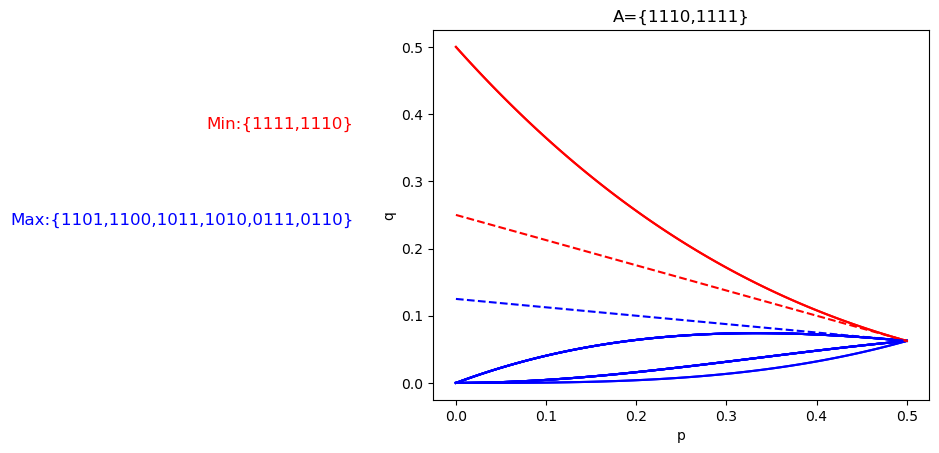

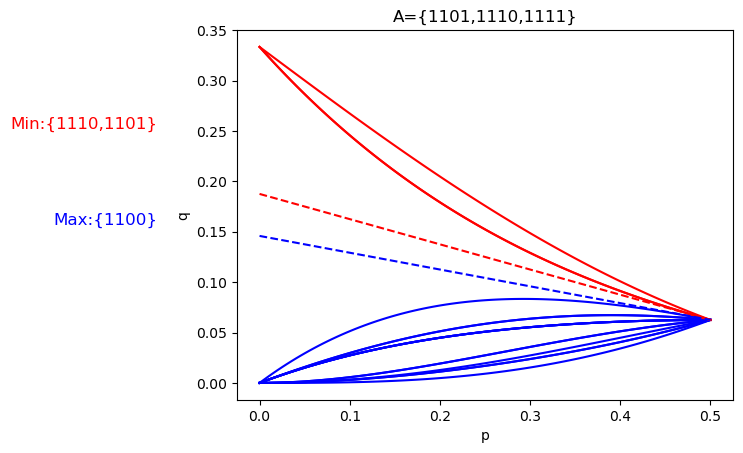

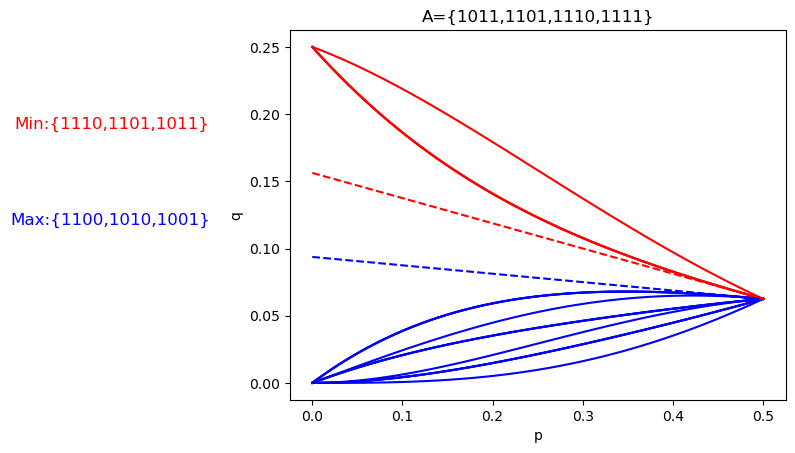

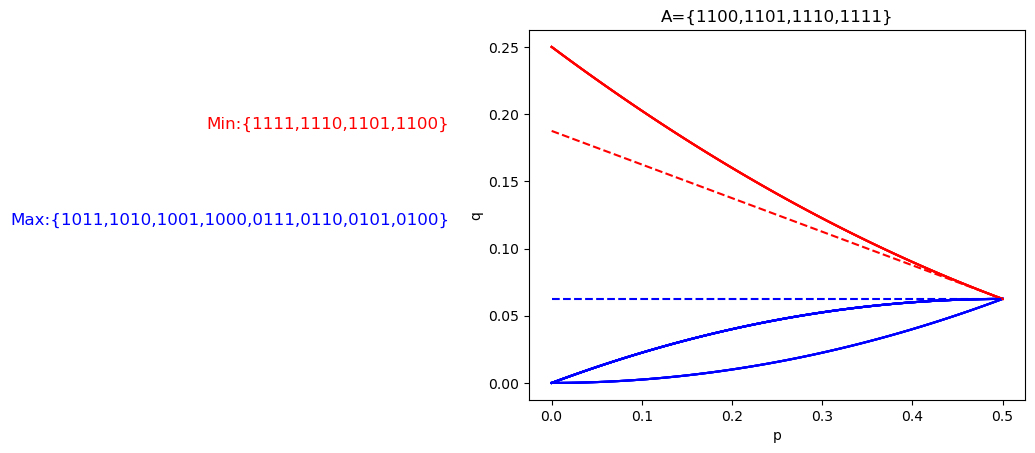

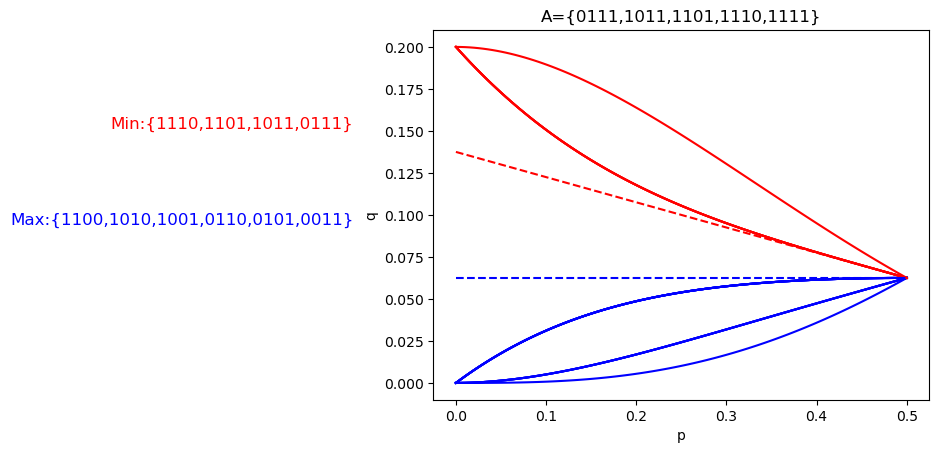

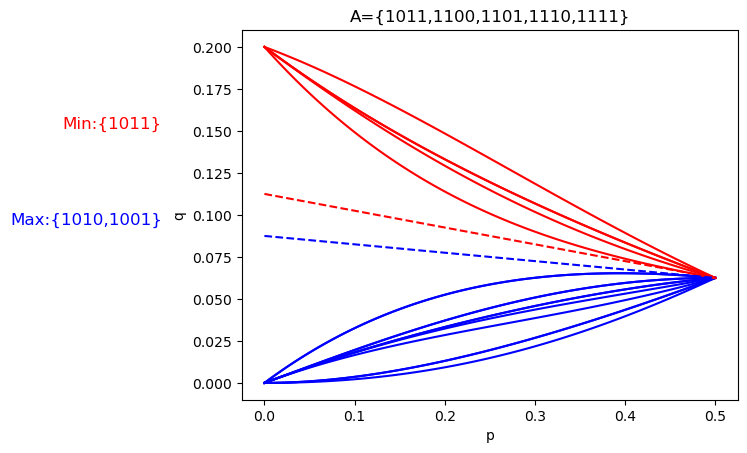

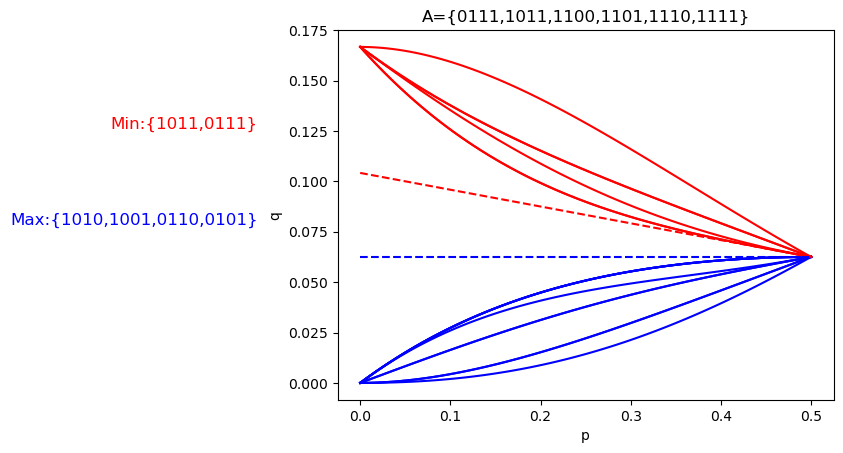

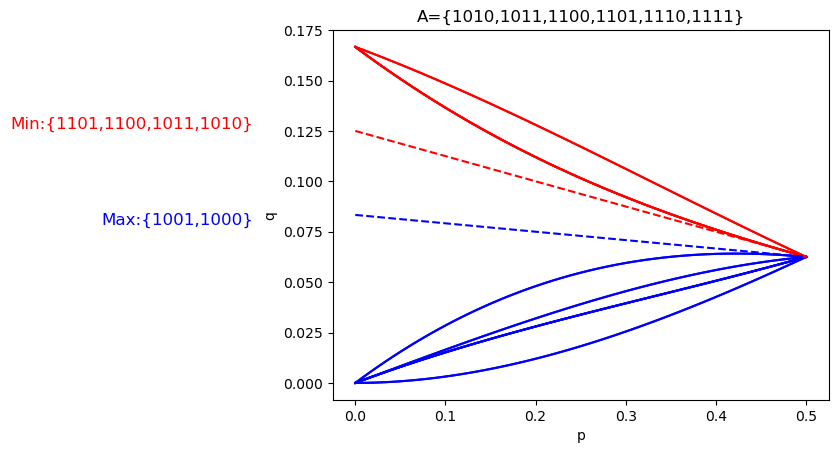

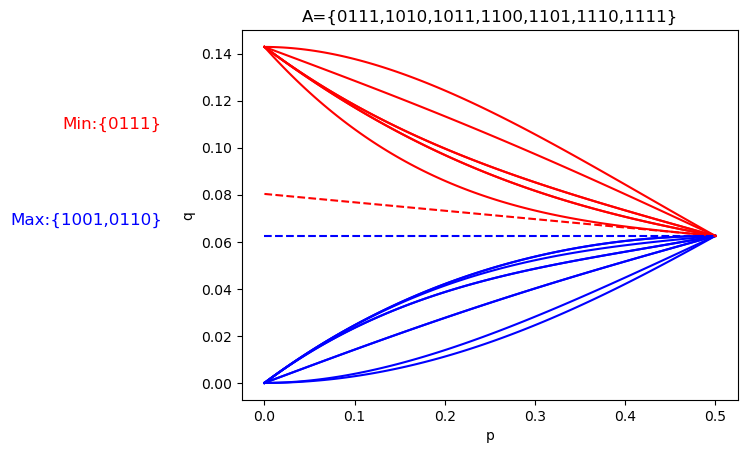

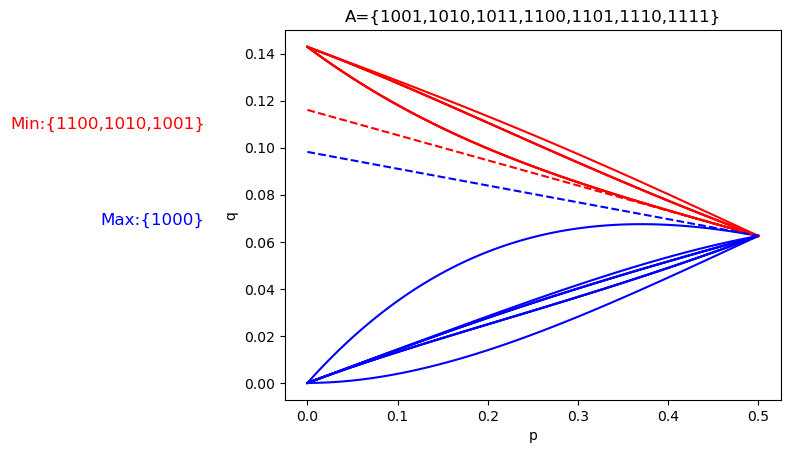

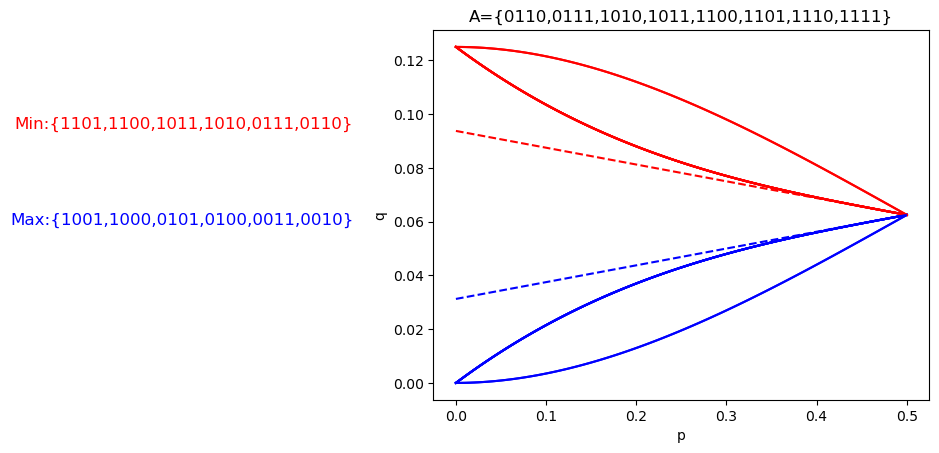

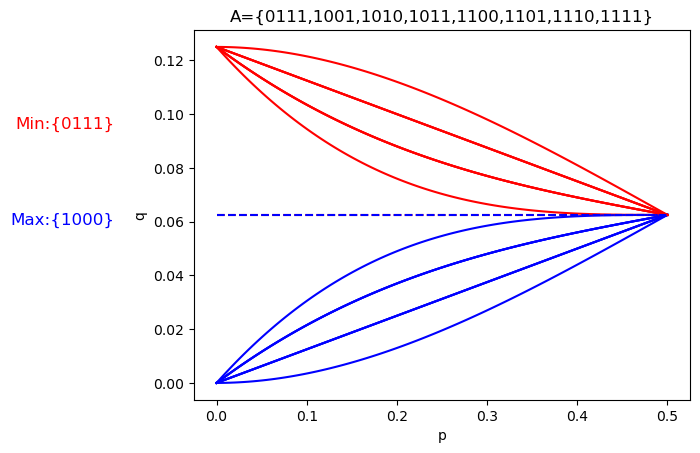

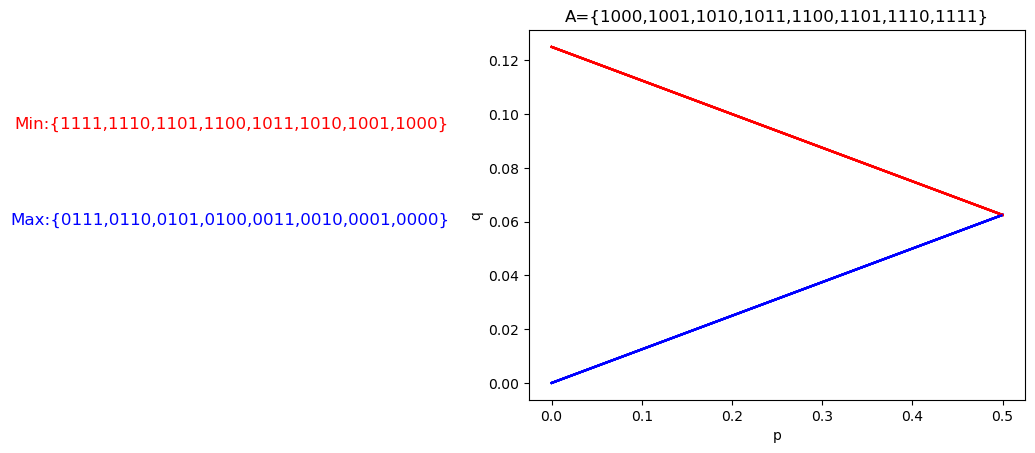

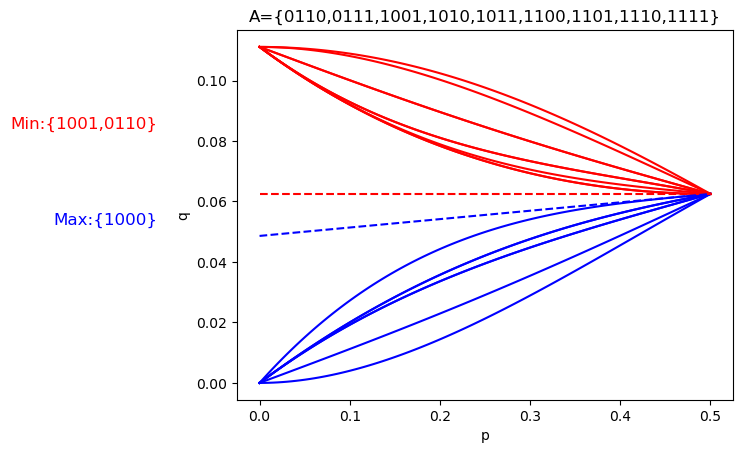

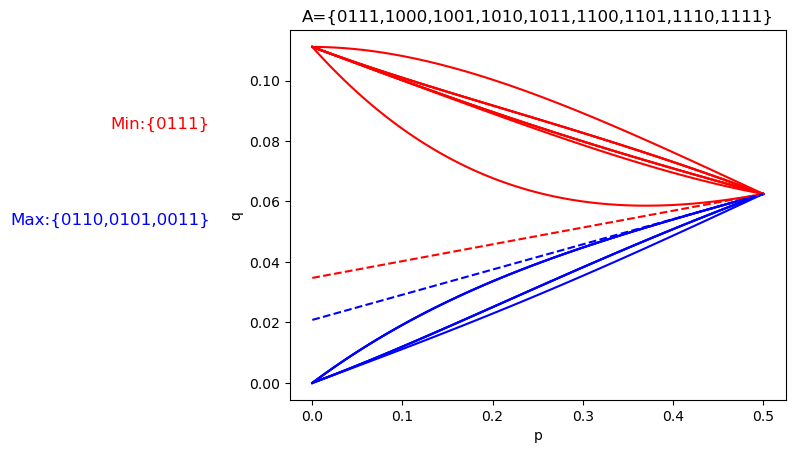

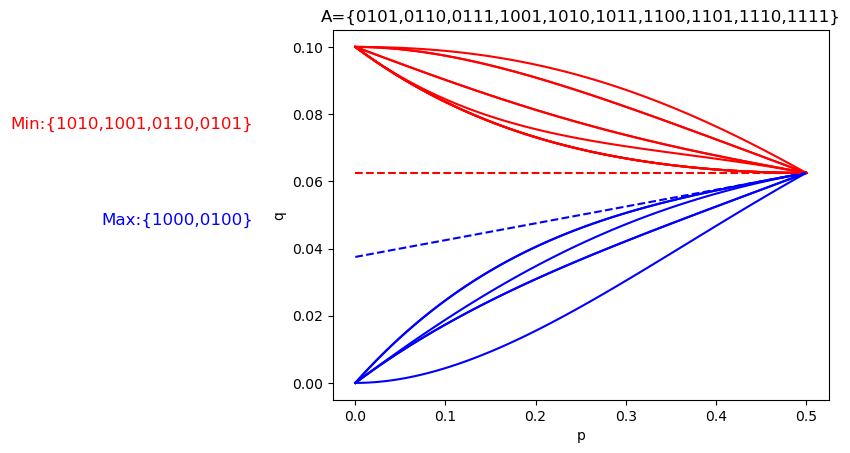

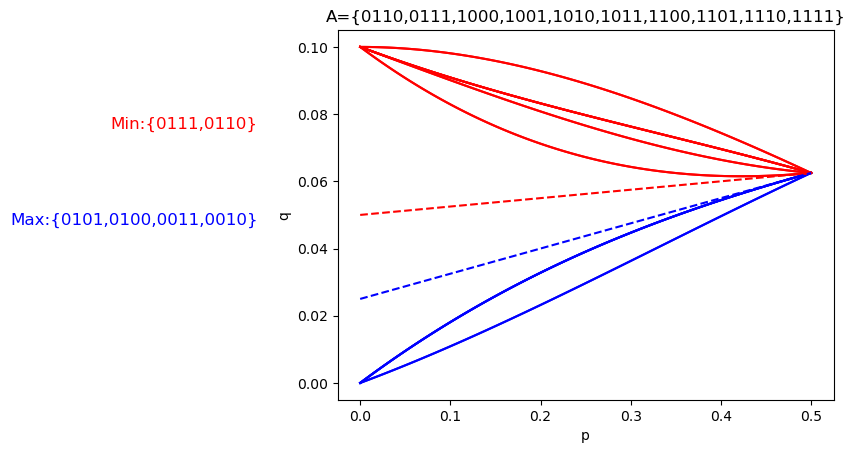

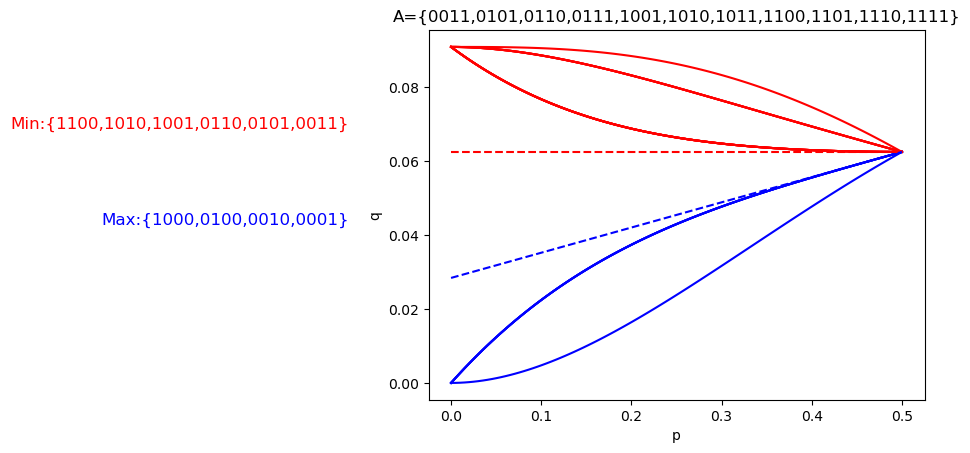

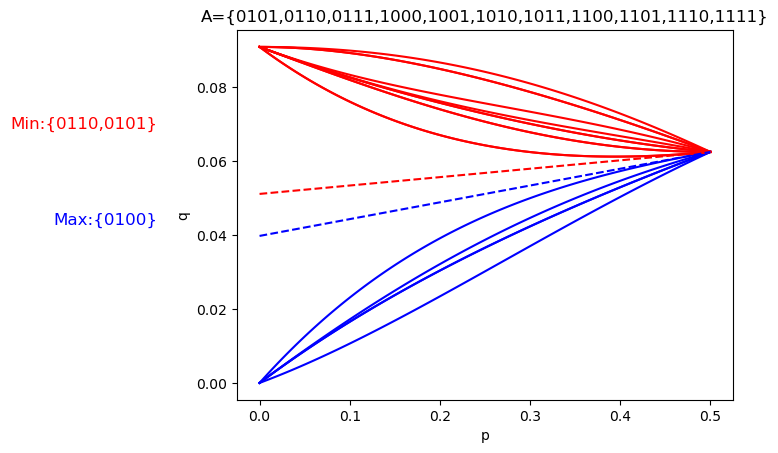

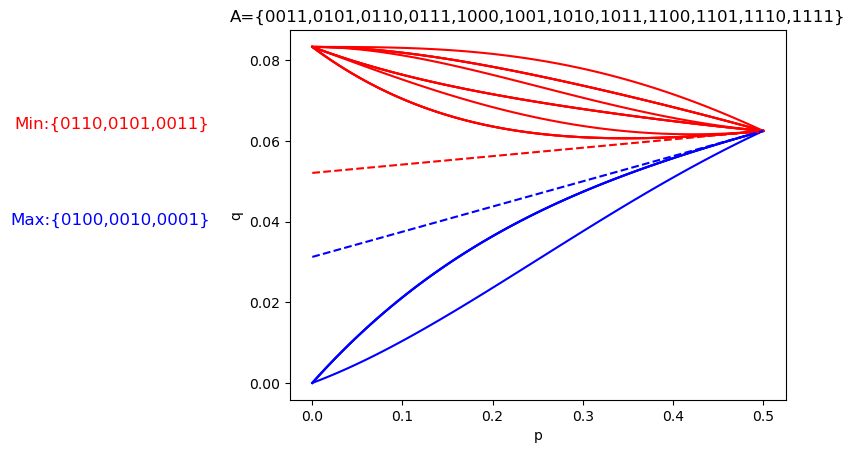

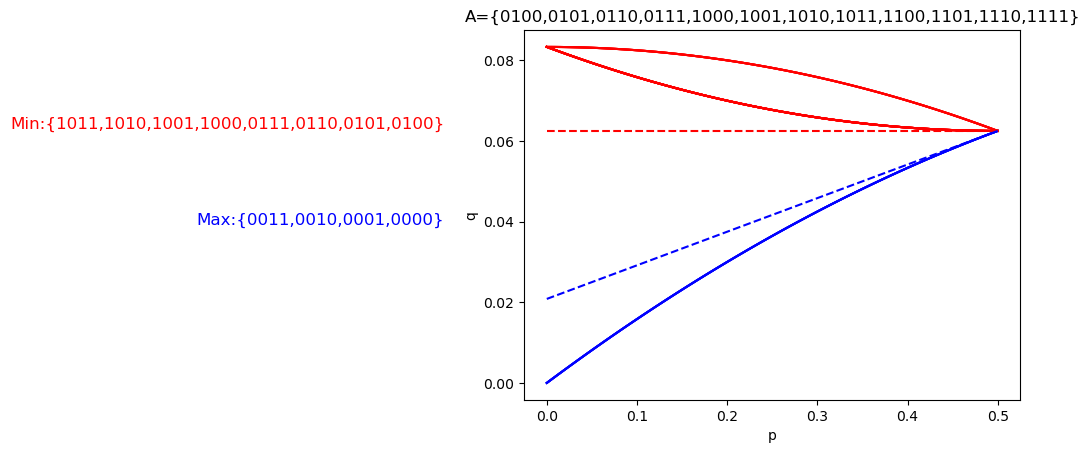

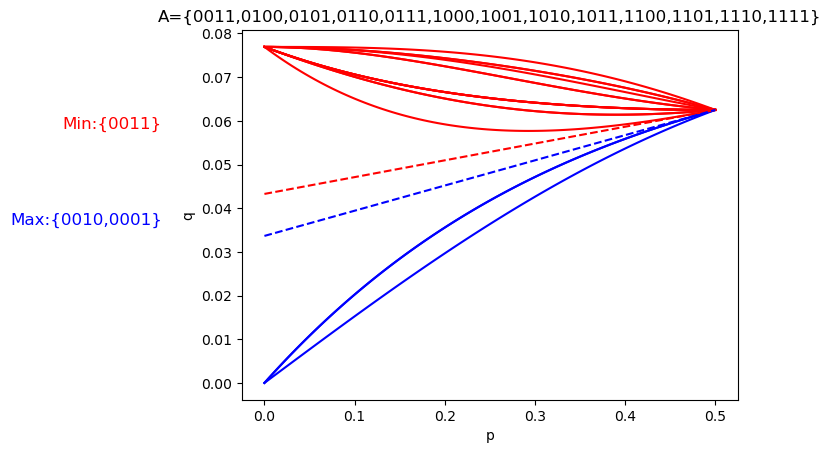

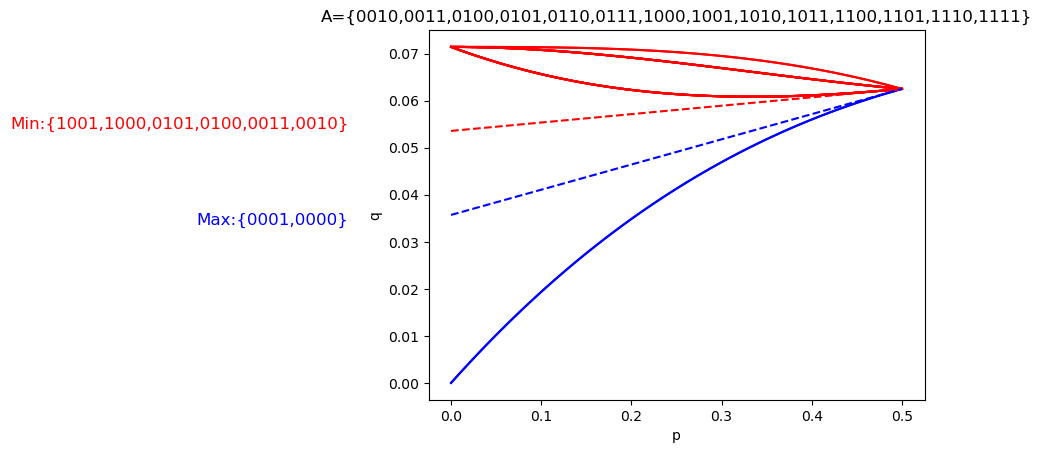

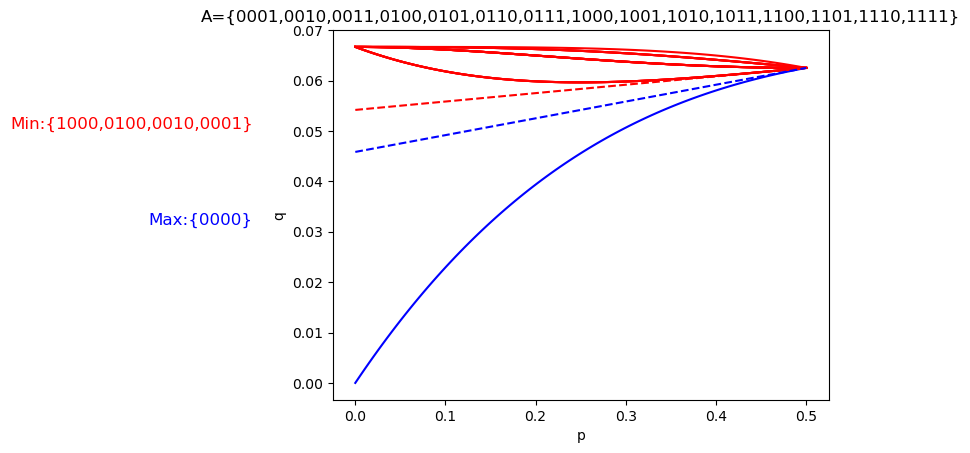

In [81]:
graph(4)